Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.impute import SimpleImputer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# EDA

In [4]:
df_train = pd.read_csv('train.csv')
df_train.head()


,Unnamed: 0,id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,0,261358,Y. Sylla,Youssuf Sylla,ST,58,76,525000.0,952.712115,18,...,43,13,19,17,7,6,8,10,7,NaN
1,1,252435,J. Austerfield,Josh Austerfield,"CM, CDM",55,75,350000.0,902.232819,19,...,48,40,48,45,14,8,5,14,11,NaN
2,2,248723,C. Malley,Connor Malley,"CAM, CM",53,66,230000.0,2873.818374,21,...,52,26,23,31,14,8,13,9,6,NaN
3,3,251157,Lee Gwang Yeon,이광연 Gwang Yeon Lee,GK,60,71,475000.0,678.608124,21,...,26,8,14,12,60,60,54,63,61,23.0
4,4,205393,J. Baldwin,Jack Baldwin,CB,63,65,475000.0,1911.674228,28,...,67,62,63,62,11,12,6,11,14,NaN


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15391 entries, 0 to 15390
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   15391 non-null  int64  
 1   id                           15391 non-null  int64  
 2   short_name                   15391 non-null  object 
 3   long_name                    15391 non-null  object 
 4   player_positions             15391 non-null  object 
 5   overall                      15391 non-null  int64  
 6   potential                    15391 non-null  int64  
 7   value_eur                    15333 non-null  float64
 8   wage_eur                     15342 non-null  float64
 9   age                          15391 non-null  int64  
 10  dob                          15391 non-null  object 
 11  height_cm                    15391 non-null  int64  
 12  weight_kg                    15391 non-null  int64  
 13  club_team_id    

In [6]:
# import test set
df_test = pd.read_csv('test.csv')
df_test.head()

,Unnamed: 0,id,short_name,long_name,player_positions,overall,potential,wage_eur,age,dob,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,3561,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,305589.4853,34,24/06/1987,...,96,20,35,24,6,11,15,14,8,NaN
1,1065,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,222132.1895,22,20/12/1998,...,88,26,34,32,13,5,7,11,6,NaN
2,2024,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,260612.1806,29,05/02/1992,...,93,35,32,29,9,9,15,15,11,NaN
3,2105,212622,J. Kimmich,Joshua Walter Kimmich,"CDM, RB",89,90,149740.3141,26,08/02/1995,...,85,85,85,79,8,15,7,15,15,NaN
4,3647,209331,M. Salah,Mohamed Salah Ghaly,RW,89,89,257348.4678,29,15/06/1992,...,90,38,43,41,14,14,9,11,14,NaN


Analysis of value_eur

In [7]:

df_train['value_eur'].describe()

count    1.533300e+04
mean     2.851328e+06
std      7.528281e+06
min      9.000000e+03
25%      4.750000e+05
50%      9.750000e+05
75%      2.000000e+06
max      1.375000e+08
Name: value_eur, dtype: float64

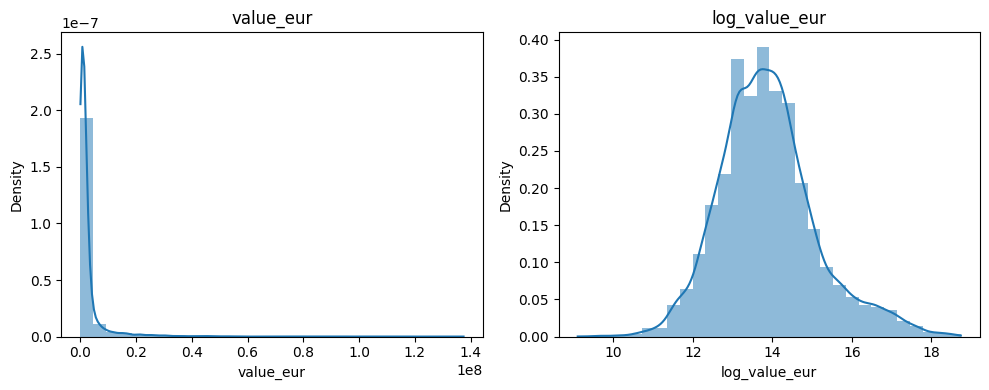

In [8]:

# Computing log in place for the selected column
df_train[f'log_value_eur'] = np.log(df_train["value_eur"]) 

# Creating subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting original 'value_eur'
sns.histplot(
    df_train["value_eur"],
    kde=True,
    bins=30,
    stat='density',
    linewidth=0,
    ax=axes[0]
)

skew_orig = df_train["value_eur"].skew()
axes[0].set_title(f"value_eur")
axes[0].set_xlabel("value_eur")
axes[0].set_ylabel('Density')

# Plotting log transformed 'value_eur'
sns.histplot(
    df_train[f'log_value_eur'],
    kde=True,
    bins=30,
    stat='density',
    linewidth=0,
    ax=axes[1]
)
skew_log = df_train[f'log_value_eur'].skew()
axes[1].set_title(f"log_value_eur")
axes[1].set_xlabel(f"log_value_eur")
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Deleting the log column
del df_train[f'log_value_eur']


Since data are very skewed we're working with log values as models performs better with those

### Investigation of value_eur's dependence on other variables

Correlation Matrix

In [9]:
corr_series = df_train.corr(numeric_only=True)["value_eur"]

top_k = corr_series.reindex(corr_series.sort_values(ascending=False).index)
selected_cols = top_k.index.tolist()
reduced_corrmat = df_train[selected_cols].corr()


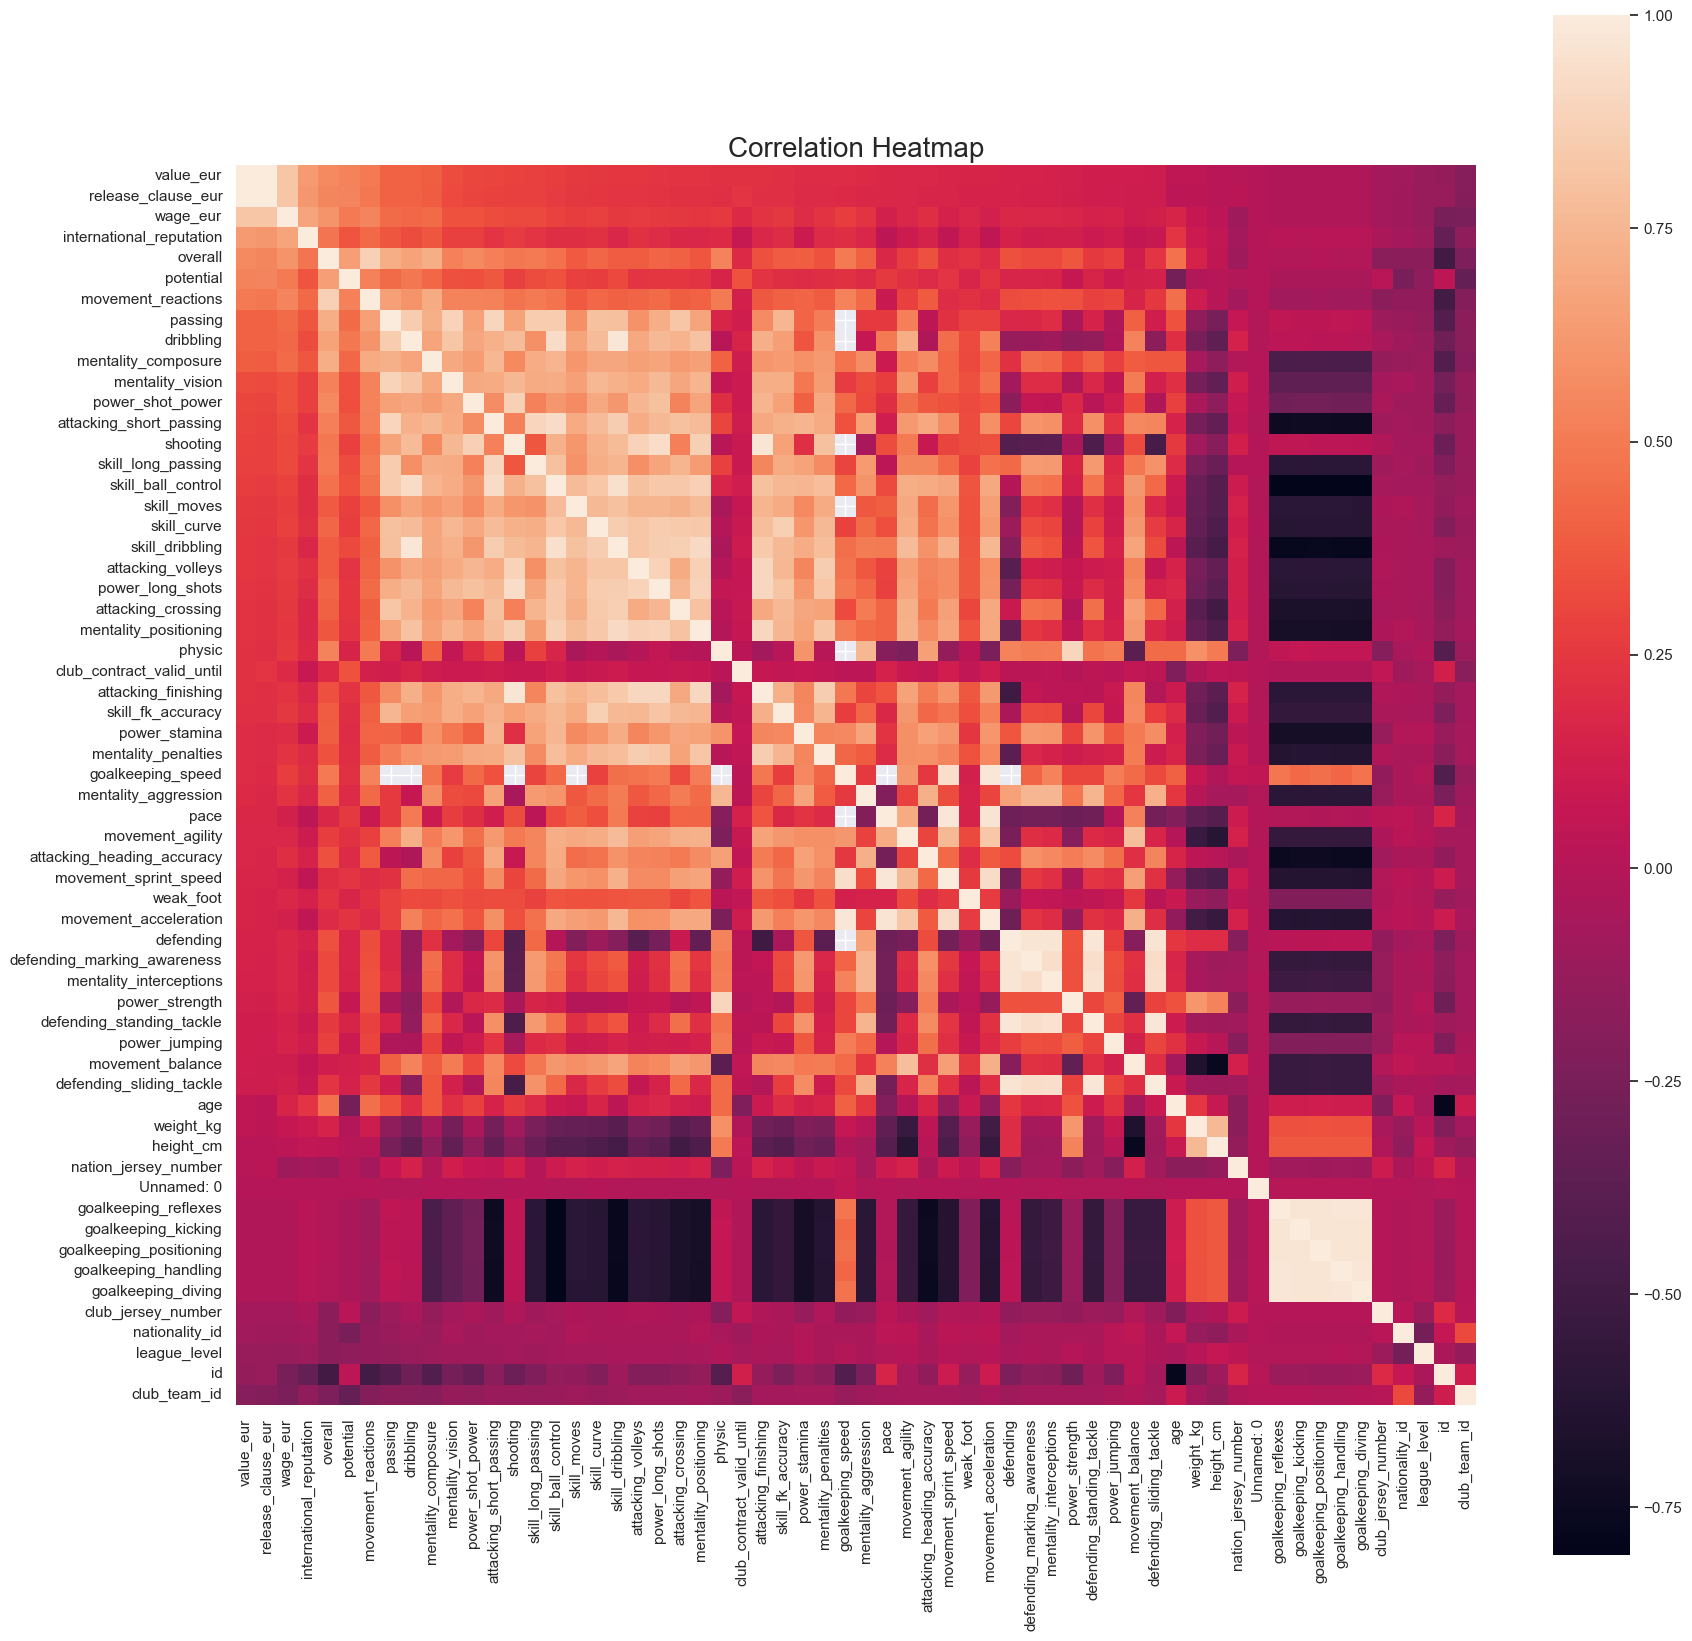

In [10]:
# setting figure size of the seaborn plot
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(reduced_corrmat, cbar=True, annot=False, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap', size=20)
plt.show()




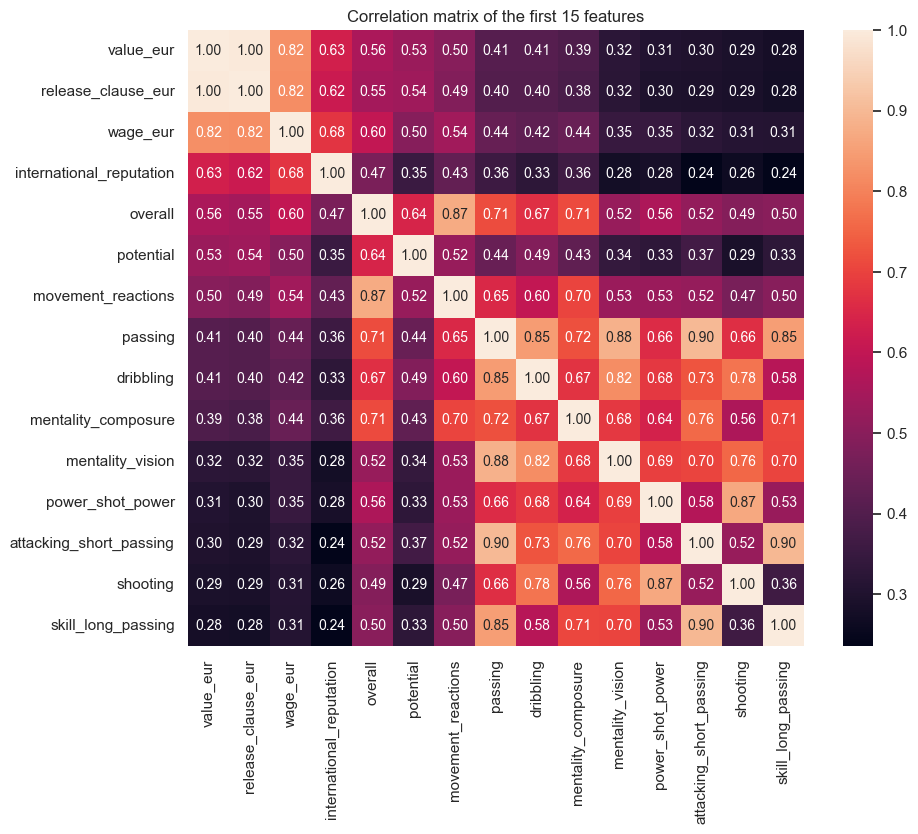

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_corrmat.iloc[:15, :15], cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation matrix of the first 15 features')
plt.show()

Although the variables release_clause_eur and wage exhibit very strong correlation with the target variable value_eur, they were intentionally excluded from the predictive model. Motivation is in the report.

The variables overall, potential, international reputation, position, age, years to end contract and league_name were chosen. 

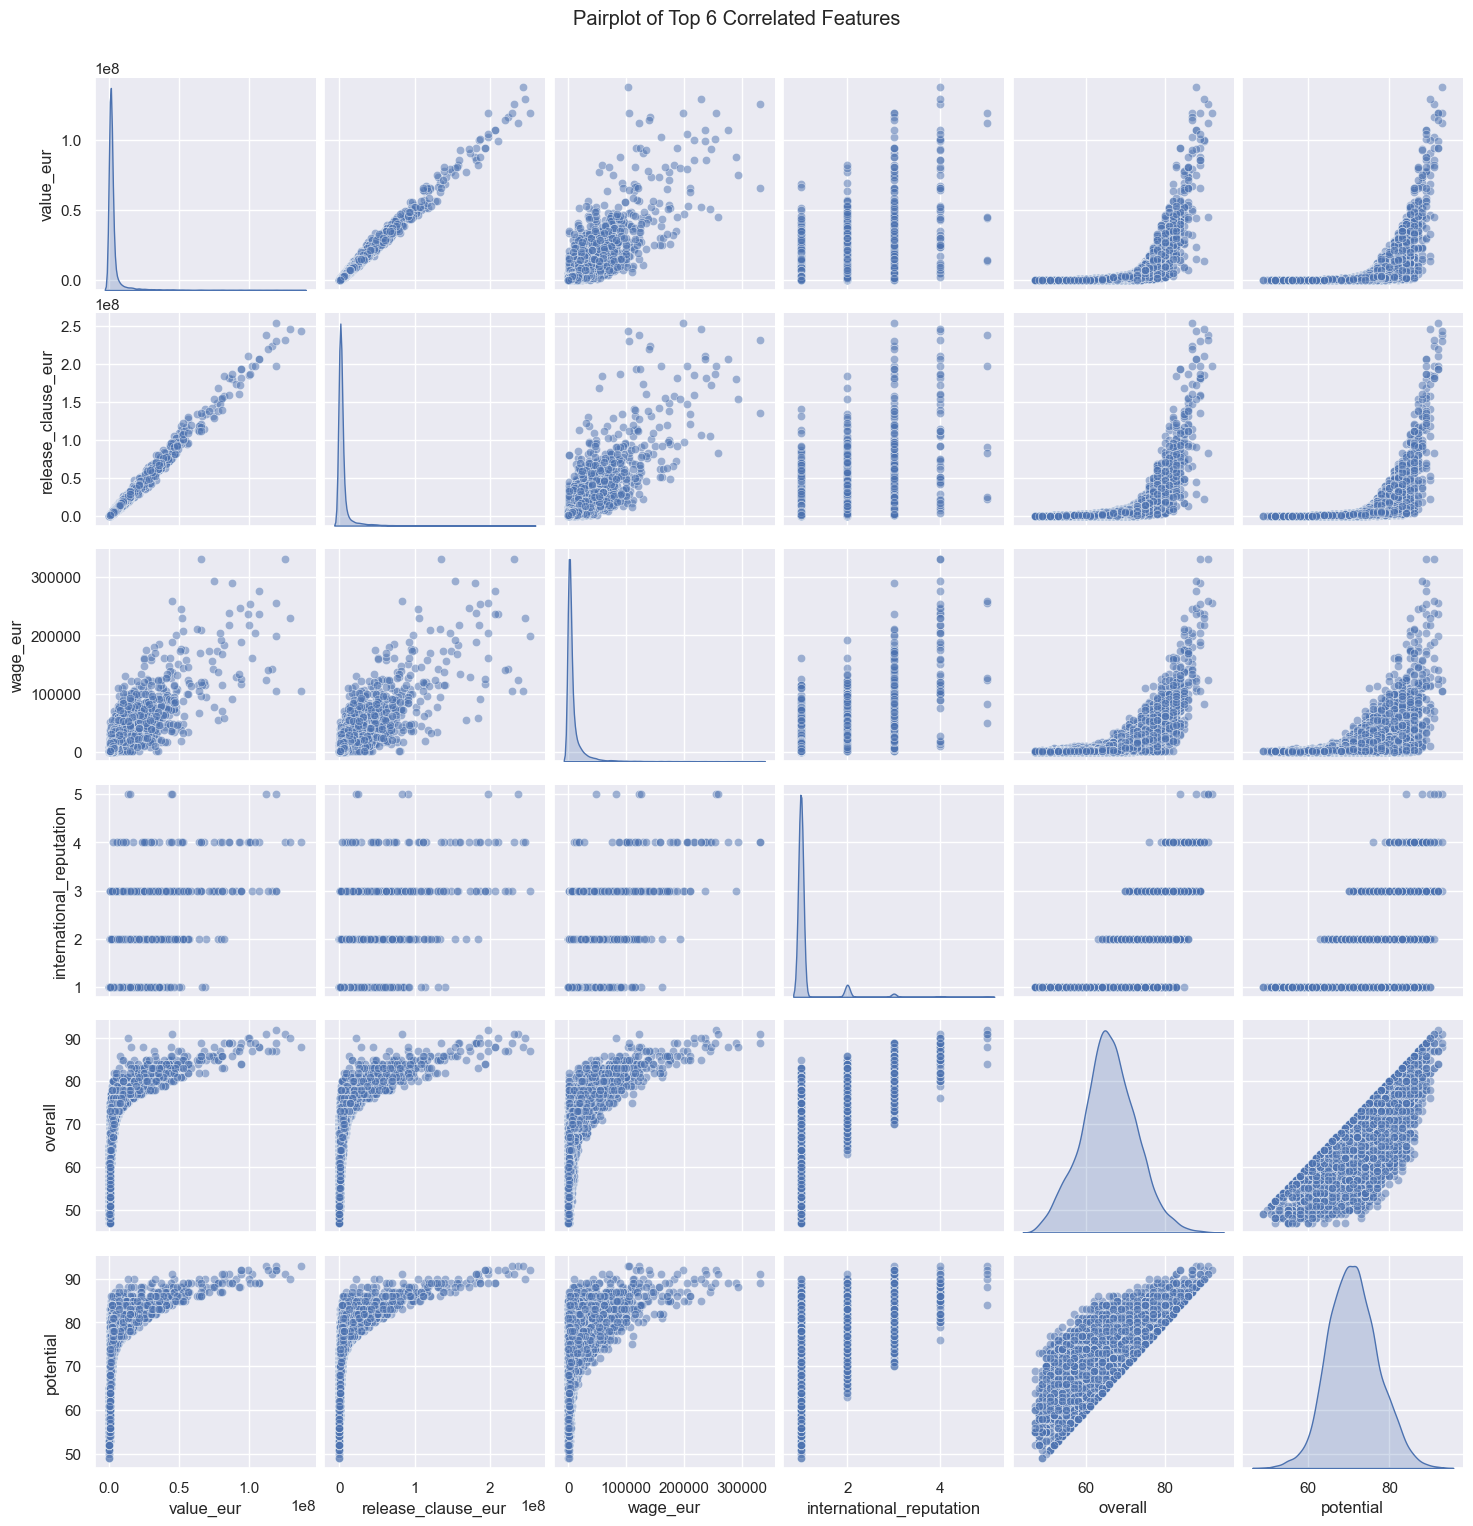

In [12]:
features_to_plot = top_k.index[:6]  # skip 'value_eur' itself

sns.pairplot(df_train, vars=features_to_plot, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Top 6 Correlated Features', y=1.02)
plt.show()

### Dealing with missing data and data types

In [13]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(25)

# When more than 15% of the data is missing, we delete the corresponding variable
cols_to_drop = percent[percent > 0.15].index  
df_train = df_train.drop(columns=cols_to_drop) 
# We drop rows with missing values in 'value_eur'
df_train = df_train.dropna(subset=['value_eur'])  

# Setting numeric columns nans to median
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='median')
imputer.fit(df_train[numeric_cols])
df_train[numeric_cols] = imputer.transform(df_train[numeric_cols])

# Dealing with missing data in categorical columns
categorical_columns = df_train.select_dtypes(include=['object', "category"]).columns 
df_train[categorical_columns] = df_train[categorical_columns].fillna("unknown") 

# Checking if there still is any missing data
assert df_train.isnull().sum().max() == 0

# Doing the same as above for the test set
df_test = df_test.drop(columns=cols_to_drop)  
numeric_cols = df_test.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='median')
imputer.fit(df_test[numeric_cols])
df_test[numeric_cols] = imputer.transform(df_test[numeric_cols])
df_test[categorical_columns] = df_test[categorical_columns].fillna("unknown")
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)

cols_to_drop = percent[percent > 0.15].index  
df_test = df_test.drop(columns=cols_to_drop)  

assert df_test.isnull().sum().max() == 0


### Creating dummy variables for players' position

DataFrame with primary_position and grouped_position (first 5 rows):
       short_name player_positions primary_position grouped_position
0        Y. Sylla               ST               ST      ST/CF/LF/RF
1  J. Austerfield          CM, CDM               CM               CM
2       C. Malley          CAM, CM              CAM              CAM
3  Lee Gwang Yeon               GK               GK               GK
4      J. Baldwin               CB               CB               CB

Number of unique primary positions: 15
Number of unique grouped positions: 10
Shape of df_train: (15333, 72)
Number of unique primary positions in test set: 15
Number of unique grouped positions in test set: 10
Shape of df_test: (3848, 71)


<Figure size 1200x600 with 0 Axes>

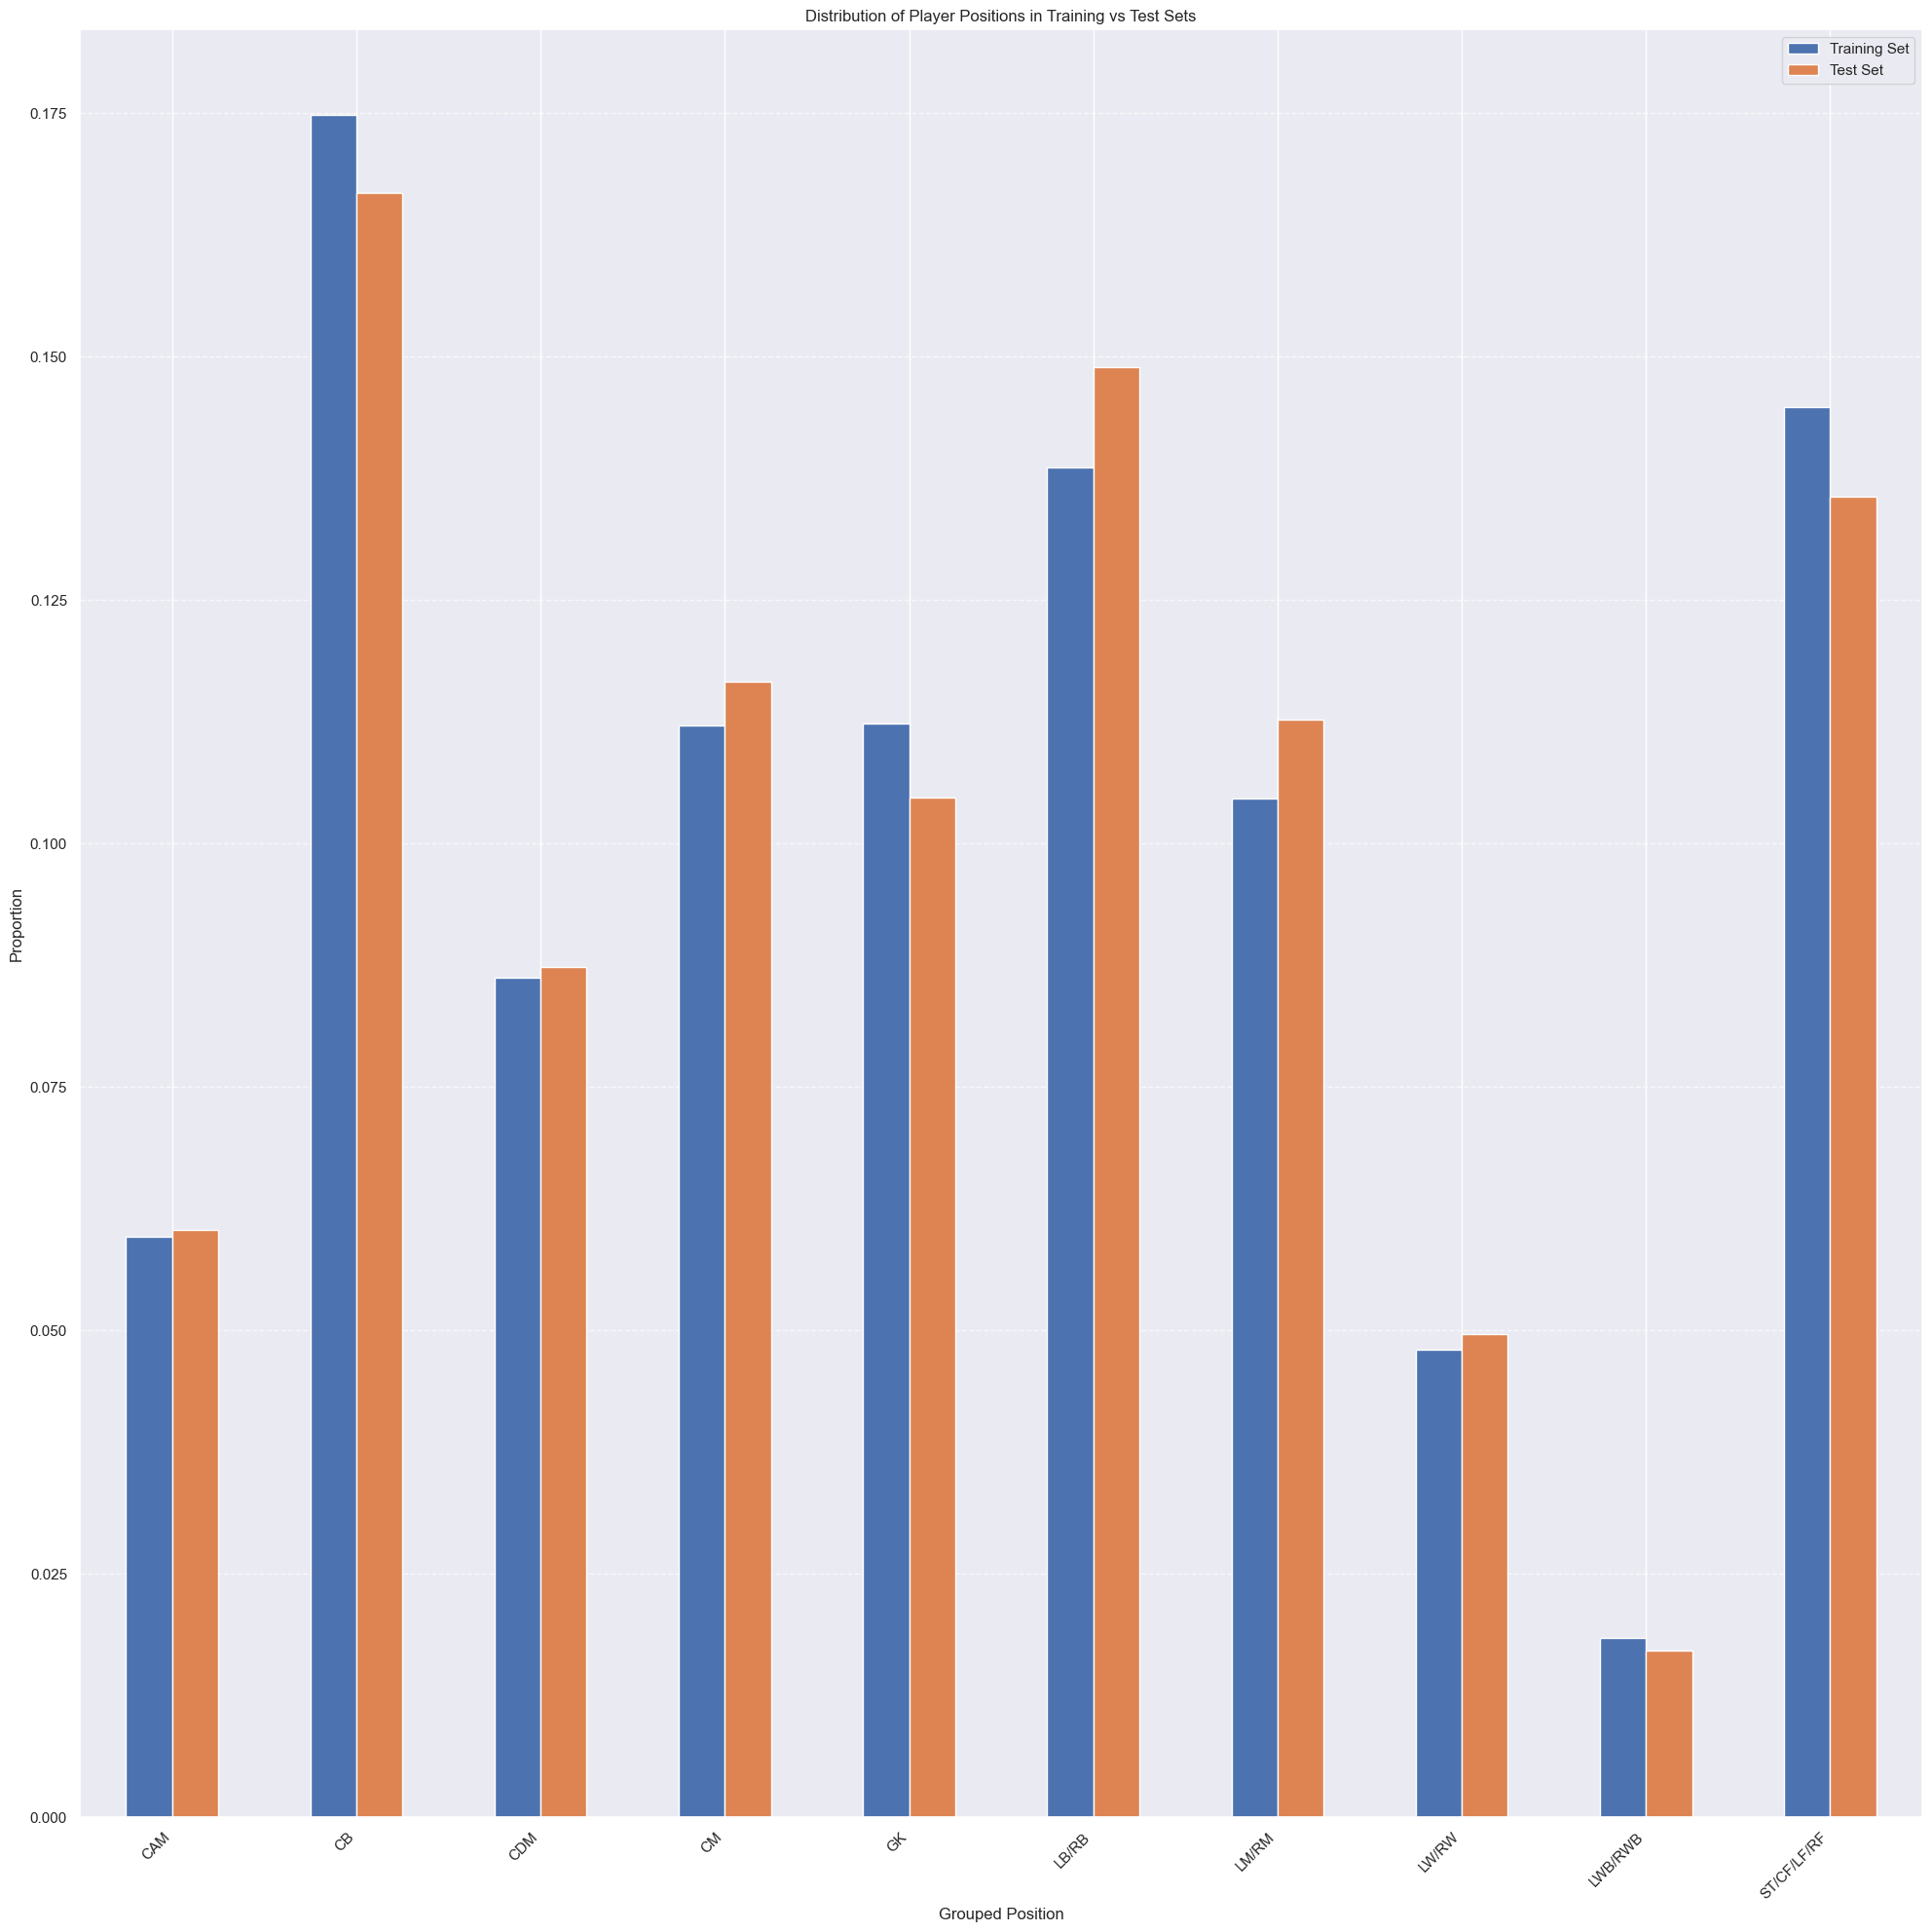

In [14]:
# Extract the first player position
df_train['primary_position'] = df_train['player_positions'].apply(lambda x: x.split(',')[0].strip())

# Define the position grouping based on affine roles
position_group_mapping = {
    'ST': 'ST/CF/LF/RF', 'CF': 'ST/CF/LF/RF', 'LF': 'ST/CF/LF/RF', 'RF': 'ST/CF/LF/RF',
    'LW': 'LW/RW', 'RW': 'LW/RW',
    'CAM': 'CAM',
    'LM': 'LM/RM', 'RM': 'LM/RM',
    'CM': 'CM',
    'CDM': 'CDM',
    'LWB': 'LWB/RWB', 'RWB': 'LWB/RWB',
    'LB': 'LB/RB', 'RB': 'LB/RB',
    'CB': 'CB',
    'GK': 'GK'
}


df_train['grouped_position'] = df_train['primary_position'].map(position_group_mapping)



# Displaying the first few rows with the new columns to verify that the implementation was correct
cols_to_display = ['short_name', 'player_positions', 'primary_position', 'grouped_position']
print("DataFrame with primary_position and grouped_position (first 5 rows):")
print(df_train[cols_to_display].head())

print(f"\nNumber of unique primary positions: {df_train['primary_position'].nunique()}")
print(f"Number of unique grouped positions: {df_train['grouped_position'].nunique()}")
print(f"Shape of df_train: {df_train.shape}")




# Process the test dataframe the same way as the training dataframe

df_test['primary_position'] = df_test['player_positions'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else "unknown")


df_test['grouped_position'] = df_test['primary_position'].map(position_group_mapping)

print(f"Number of unique primary positions in test set: {df_test['primary_position'].nunique()}")
print(f"Number of unique grouped positions in test set: {df_test['grouped_position'].nunique()}")
print(f"Shape of df_test: {df_test.shape}")

# Creating a comparison between training and test set position distributions
train_positions = df_train['grouped_position'].value_counts(normalize=True).sort_index()
test_positions = df_test['grouped_position'].value_counts(normalize=True).sort_index()

# Combining them into a DataFrame for easy comparison
position_comparison = pd.DataFrame({
    'Training Set': train_positions,
    'Test Set': test_positions
})


plt.figure(figsize=(12, 6))
position_comparison.plot(kind='bar')
plt.title('Distribution of Player Positions in Training vs Test Sets')
plt.xlabel('Grouped Position')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()





In [15]:
# Create dummy variables for 'grouped_position'
position_dummies = pd.get_dummies(df_train['grouped_position'], prefix='pos_grouped')

# Concatenate the dummy variables with the original DataFrame
df_train = pd.concat([df_train, position_dummies], axis=1)

# Same for the test set
position_dummies_test = pd.get_dummies(df_test['grouped_position'], prefix='pos_grouped')

df_test = pd.concat([df_test, position_dummies_test], axis=1)



### Creating a dummy variable for the players playing in a Top-5 League

In [16]:
# Define the list of top leagues
top_leagues = [
    "Spain Primera Division",  
    "English Premier League",  
    "Italian Serie A",         
    "German 1. Bundesliga",    
    "French Ligue 1"           
]

# Create the 'is_top_league' dummy variable
# It will be 1 if the league_name is in top_leagues, 0 otherwise
df_train['is_top_league'] = df_train['league_name'].isin(top_leagues).astype(int)

# Display the count of players in top leagues vs other leagues
print("Value counts for 'is_top_league':")
print(df_train['is_top_league'].value_counts())

# Display a few rows to verify
print("\nDataFrame with 'is_top_league' (first 5 rows):")
print(df_train[['league_name', 'is_top_league']].head())

# Doing the same for the test set
df_test['is_top_league'] = df_test['league_name'].isin(top_leagues).astype(int)
print("Value counts for 'is_top_league' in test set:")
print(df_test['is_top_league'].value_counts())


Value counts for 'is_top_league':
is_top_league
0    12920
1     2413
Name: count, dtype: int64

DataFrame with 'is_top_league' (first 5 rows):
                   league_name  is_top_league
0   Belgian Jupiler Pro League              0
1  English League Championship              0
2  English League Championship              0
3            Korean K League 1              0
4         Scottish Premiership              0
Value counts for 'is_top_league' in test set:
is_top_league
0    3285
1     563
Name: count, dtype: int64


In [17]:
# Calculate 'Years to end contract'
# Assuming the current year for calculation is 2021 as per the problem description
current_year = 2021
df_train['years_to_end_contract'] = df_train['club_contract_valid_until'] - current_year

# Doing the same for the test set
df_test['years_to_end_contract'] = df_test['club_contract_valid_until'] - current_year



### Running Gradient Boosting

#### Hyperparameters tuning

In [18]:
# 1) Load your data (assumes df_train, df_test already in memory)
# selected columns
selected_cols = [
    'overall', 'potential', 'age', 'years_to_end_contract',
    'pos_grouped_CAM','pos_grouped_CB','pos_grouped_ST/CF/LF/RF',
    'pos_grouped_CDM','pos_grouped_CM','pos_grouped_GK',
    'pos_grouped_LB/RB','pos_grouped_LM/RM','pos_grouped_LW/RW',
    'pos_grouped_LWB/RWB','international_reputation','is_top_league'
]

X_train = df_train[selected_cols].to_numpy()
y_train = np.log(df_train['value_eur'].to_numpy())

# 2) Define base estimator and parameter grid
base_gbr = GradientBoostingRegressor(max_depth=3, random_state=42)

param_grid = {
    'learning_rate': [0.1, 0.12, 0.14],
    'min_samples_split': [4, 6, 8],
    'n_estimators': [400, 500, 600],
    'subsample': [0.7, 0.8, 0.9]
}


# 3) Set up CV splitter and GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=base_gbr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1,
)

# 4) Run the grid search
grid.fit(X_train, y_train)

# 5) Inspect best hyper-parameters and CV RMSE
best_params = grid.best_params_
best_neg_mse = grid.best_score_
best_rmse = np.sqrt(-best_neg_mse)

print("Best hyper-parameters:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"CV RMSE (log-space fit): {best_rmse:.4f}")


Best hyper-parameters:
  learning_rate: 0.14
  min_samples_split: 4
  n_estimators: 600
  subsample: 0.8
CV RMSE (log-space fit): 0.0414


#### Final Train and prediction

r2 = 0.9964450988830863
RMSE: 448843.997369562


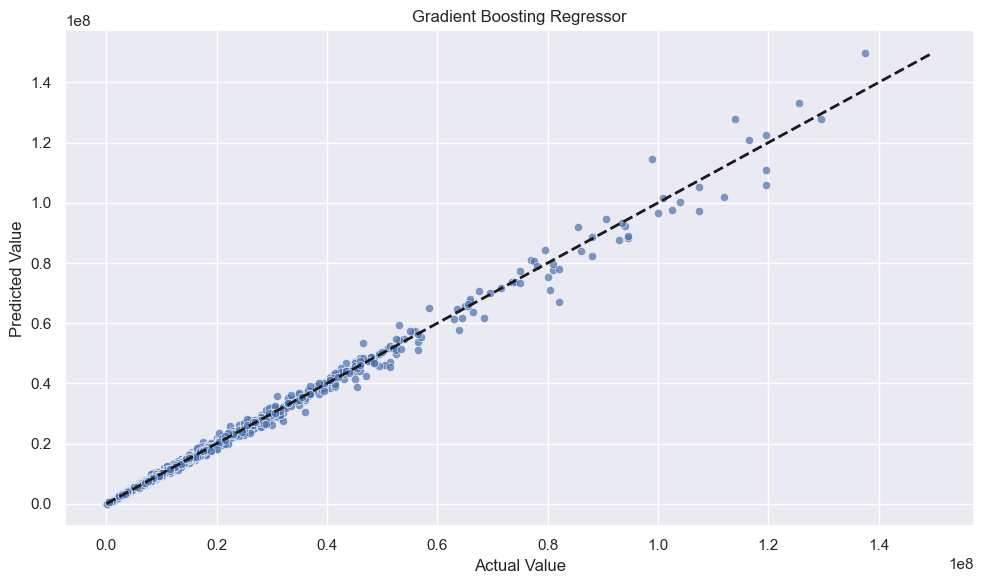

In [19]:
# Create Gradient Boosting model with optimal hyper-parameters
gradient_boosting_regr = GradientBoostingRegressor(learning_rate= 0.14, max_depth= 3, min_samples_split= 8, n_estimators= 600, subsample=0.8, random_state=42)

# Get cross-validated predictions
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(gradient_boosting_regr, X_train, y_train, cv=cv)

# Print average metrics
print(f"r2 = {r2_score(np.exp(y_train), np.exp(y_pred_cv))}")
print(f"RMSE: {np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_cv)))}")


# Fit the model on the entire X_train for final training
gradient_boosting_regr.fit(X_train, y_train)


# Visualize predictions vs actual values from cross-validation
plt.figure(figsize=(10, 6))
all_vals = np.concatenate([np.exp(y_train), np.exp(y_pred_cv)])
vmin, vmax = all_vals.min(), all_vals.max()
lims = (vmin, vmax)

plt.scatter(np.exp(y_train), np.exp(y_pred_cv), alpha=0.7, edgecolor='white', linewidth=0.5)
plt.plot(lims, lims, 'k--', lw=2)
plt.title(f'Gradient Boosting Regressor')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Test the model on the test set
# Extract X_train from the test set
X_train_test = df_test[selected_cols].to_numpy()
# Predict using the trained model
y_pred_test = np.exp(gradient_boosting_regr.predict(X_train_test))


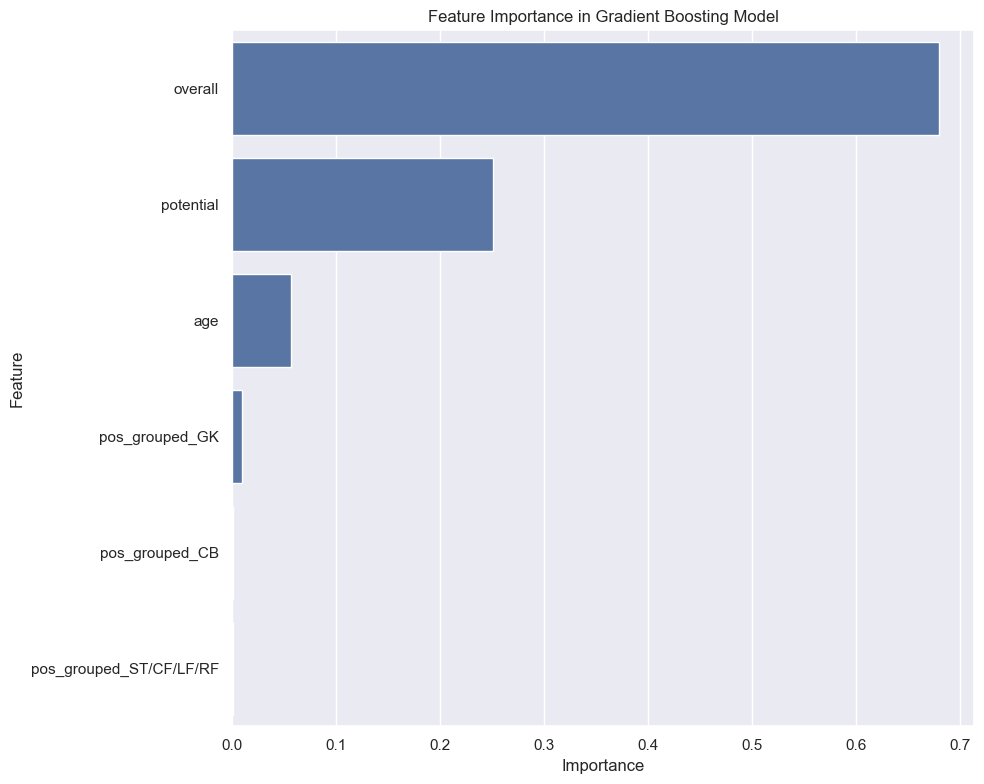

Top 5 most important features:
          Feature  Importance
0         overall    0.679894
1       potential    0.250794
2             age    0.056711
9  pos_grouped_GK    0.009836
5  pos_grouped_CB    0.001008


In [20]:
# Get feature importances from the trained model
importances = gradient_boosting_regr.feature_importances_
feature_names = selected_cols

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df[:6])
plt.title('Feature Importance in Gradient Boosting Model')
plt.tight_layout()
plt.show()

print("Top 5 most important features:")
print(importance_df.head(5))

In [21]:
#EXPORT
df_test['value_eur'] = y_pred_test
df_test['value_eur'].to_csv('submission.csv', index=True)
